## Initial setup
This notebook has the analysis validation of the third regime using changes on base prices from different technologies.


In [1]:

'''
By Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 2 March 2021

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob
from matplotlib.pyplot import figure
from matplotlib.legend_handler import HandlerLine2D
import statistics
import matplotlib.patches as mpatches

includePlots = True

C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



## Load Historical data for vaildation 
The following files include historic data on GHGE, tariffs and wholesale prices for validation.



### GHGE Historic

The key role of decarbonising the electricity sector in Victoria: The electricity sector in Victoria accounted for more than half of emissions in 2016. After the retirement of Hazelwood, this contribution still sited at 42% of the state's emissions. At the validation date (2020), historic emissions data for the electricity sector in Victoria is only available until 2017. 2018 number has been assumed to be 2017 (56.1) value minus a net reduction of 11.8 MtCO2-e given the retirement of Hazelwood in 2017.
Sources of data:
- https://engage.vic.gov.au/climate-change-reducing-victorias-greenhouse-gas-emissions
- https://www.climatechange.vic.gov.au/information-and-resources/greenhouse-gas-emissions-in-victoria
- https://www.climatechange.vic.gov.au/__data/assets/pdf_file/0033/395079/Victorian-Greenhouse-Gas-Emissions-Report-2018.pdf
- https://www.climatechange.vic.gov.au/__data/assets/pdf_file/0016/443014/Victorian-Greenhouse-Gas-Emissions-Report-2019.pdf

In [2]:
# CSV is built based on the information available in the previous sources 
historic_emissions_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/19902018_historic_emissions_Vic.csv', index_col='Time (Year)')
historic_emissions_df.head(10)

,Hist_GHGE_MtCO2e
Time (Year),
1990,44.2
1991,46.3
1992,47.5
1993,45.3
1994,45.5
1995,47.8
1996,49.9
1997,52.6
1998,59.2


### Wholesale historic
Wholesale data can be found since 2005 in a monthly basis. Therefore, the monthly summary report is used for this validation. 
Sources of data:
- https://opennem.org.au/energy/vic1/

In [3]:
historic_wholesale_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/2005_2020_OpenNemDataV1.csv', index_col='Time (Month)')
historic_wholesale_df.index = pd.to_datetime(historic_wholesale_df.index)

historic_wholesale_df.head(5)

,Temperature - C,Solar (Rooftop) Market Value - $,Solar (Rooftop) - GWh,Solar (Utility) Market Value - $,Solar (Utility) - GWh,Wind Market Value - $,Wind - GWh,Hydro Market Value - $,Hydro - GWh,Battery (Discharging) Market Value - $,...,Wind Market Value - $/MWh,Hydro Market Value - $/MWh,Battery (Discharging) Market Value - $/MWh,Gas (OCGT) Market Value - $/MWh,Gas (Steam) Market Value - $/MWh,Brown Coal Market Value - $/MWh,Imports Market Value - $/MWh,Exports Market Value - $/MWh,Volume Weighted Price (Historic) - $/MWh,Imports % from wholesale price
Time (Month),,,,,,,,,,,,,,,,,,,,,
2005-04-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,11848263.30,304.50,0.0,...,0.0,38.910553,0.0,44.023585,39.220646,30.605720,38.289921,-19.009200,31.809904,20%
2005-05-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8161908.91,260.01,0.0,...,0.0,31.390750,0.0,35.260919,35.709309,24.667570,31.791585,-18.044240,25.330109,26%
2005-06-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,6597447.23,200.71,0.0,...,0.0,32.870546,0.0,50.142422,37.533559,23.616642,30.781600,-17.572286,24.249596,27%
2005-07-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,7421383.61,182.63,0.0,...,0.0,40.636169,0.0,56.781103,39.030981,26.668752,32.787615,-17.823924,27.651352,19%
2005-08-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,10855283.83,207.39,0.0,...,0.0,52.342369,0.0,98.739498,60.657385,30.161182,39.640099,-16.523324,32.022126,24%


### Tariffs historic

Different sources where used to construct a historic dataset of average electricity tariffs.
- Historic data found in the [ACCC report](https://www.accc.gov.au/system/files/Victorian%20Electricity%20Distribution%20Networks.pdf) from 2017. This data is from a household in VIC that use 4000 KWh/year, has gas water heating. The report has data for the years 1995, 2001, 2002, and from 2007 to 2017. But data is used from 2001. Since the data is given as total bill per year in /$, the price per KWh is computed as (AnnualBill/4000KWh)*100, to get the value in c/kWh.
- [St. Vinnies historic data](https://www.vinnies.org.au/page/Our_Impact/Incomes_Support_Cost_of_Living/Energy/VIC/) on tariffs per retailer and distribution area. This data has been collected since 2010, every quarter of the year. I used the ‘first block’ charges to calculate the average charge of usage in c/KWh. 

Prices from the reports and data sources are adjusted to 2019 values as simulatied tariffs are presented in real terms for the base year of 2019.


In [4]:
# historic average tariffs in c/kWh (real 2019) filtered from reports
yearly_historic_tariffs = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/2001to2019_historicTariffs.csv', index_col='Time (Year)')
yearly_historic_tariffs.head(10)

,St Vinnies Historic c/kWh (2019),Historic price from review c/KWh (2019)
Time (Year),,
2001,NaN,27.32
2002,NaN,27.03
2003,NaN,NaN
2004,NaN,NaN
2005,NaN,NaN
2006,NaN,NaN
2007,NaN,23.38
2008,NaN,25.55
2009,NaN,27.74


## Load the results
These results are a tuple of one data frame with the changes on each input variable, and a dictionary with the outputs. 

In [5]:
from ema_workbench import load_results

#results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_EET3Regime2021-Mar-01.tar.gz')
#results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOL-HypoPast-2021-Jan-20.tar.gz')
results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOLhypopast2021-Mar-03_includ_wholesale_month.tar.gz')


In [6]:
experiments, outcomes = results

# Create a temporary copy of dictionary, with Outcomes Year
outcomesYear = dict(outcomes)

keysToRemove = [] 
# Iterate over the temporary dictionary and delete corresponding key from original dictionary
for (key, value) in outcomesYear.items() :
    if 'Month' in key:
        keysToRemove.append(key)
        
for k in keysToRemove:        
    del outcomesYear[k]   
    
        

Code to remove a Nan experiment if existent

Run this code to find the experiment that needs to be removed:

```python
	outcome_df = dict()
	for k in outcomes.keys():
	     outcome_df[k] = pd.DataFrame.from_dict(outcomes[k])
	    
	
	for k in outcomes.keys():
	    print(outcome_df[k][outcome_df[k].isna().any(axis=1)])

```

and then use the ``id`` of the experiment and remove it with the code below

In [7]:
outcomes_wo_nan = {}
for k in outcomes.keys():
    l1 = outcomes[k][0:41357]
    l2 = outcomes[k][41357+1:41379]
    l3 = outcomes[k][41379+1:]
    outcomes_wo_nan[k] = np.concatenate((l1,l2,l3))
outcomes = outcomes_wo_nan


In [8]:
experiments.describe()

,consumption,domesticConsumptionPercentage,generationRolloutPeriod,importPriceFactor,includePublicallyAnnouncedGen,learningCurve,nameplateCapacityChangeBattery,nameplateCapacityChangeBrownCoal,nameplateCapacityChangeOcgt,nameplateCapacityChangeSolar,...,priceChangePercentageBattery,priceChangePercentageBrownCoal,priceChangePercentageOcgt,priceChangePercentageWater,priceChangePercentageWind,semiScheduleGenSpotMarket,semiScheduleMinCapMarketGen,solarUptake,technologicalImprovement,wholesaleTariffContribution
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,...,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.0000,105000.000000,105000.000000,105000.000000,105000.000000
mean,2.000952,34.977381,5.495714,0.005952,0.500000,7.498095,0.003095,-0.013810,-0.022857,0.030238,...,-0.026429,0.005714,-0.019048,-0.018810,0.028810,9.0000,150.633333,2.000714,7.500000,27.493333
std,1.415062,8.947333,2.872209,29.151635,0.500002,4.609794,29.153775,29.154413,29.154383,29.152714,...,29.152857,29.153967,29.154059,29.155541,29.155884,0.8165,86.602028,1.414978,4.609794,10.387013
min,0.000000,20.000000,1.000000,-50.000000,0.000000,0.000000,-50.000000,-50.000000,-50.000000,-50.000000,...,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,8.0000,1.000000,0.000000,0.000000,10.000000
25%,1.000000,27.000000,3.000000,-25.000000,0.000000,3.750000,-25.000000,-25.000000,-25.000000,-25.000000,...,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,8.0000,75.750000,1.000000,3.750000,18.750000
50%,2.000000,35.000000,5.500000,0.000000,0.500000,7.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.0000,150.500000,2.000000,7.500000,27.500000
75%,3.000000,43.000000,8.000000,25.000000,1.000000,11.250000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,10.0000,225.250000,3.000000,11.250000,36.250000
max,4.000000,50.000000,10.000000,50.000000,1.000000,15.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,10.0000,300.000000,4.000000,15.000000,45.000000


In [9]:
bau_scenario_id = max(experiments['scenario']) + 1

new_row = pd.DataFrame({'annualCpi': 0.0233, 'annualInflation': 0.033, 'nameplateCapacityChangeBrownCoal': 0,
       'nameplateCapacityChangeWater': 0,'nameplateCapacityChangeOcgt': 0, 'consumption': 0, 'energyEfficiency': 0,
       'generationRolloutPeriod':1, 'generatorRetirement':0,
       'includePublicallyAnnouncedGen':0, 'learningCurve':0.05,
       'nonScheduleGenSpotMarket': 10, 'nonScheduleMinCapMarketGen':0.1,
       'priceChangePercentageBrownCoal':0, 'priceChangePercentageOcgt':0,
       'priceChangePercentageWater':0, 'priceChangePercentageWind':0, 'rooftopPV':7,
       'domesticConsumptionPercentage':0,
       'scheduleMinCapMarketGen':30, 'semiScheduleGenSpotMarket':8,
       'semiScheduleMinCapMarketGen':30, 'solarUptake':0,
       'technologicalImprovement':0.01, 'wholesaleTariffContribution':28.37, 'scenario': bau_scenario_id,
       'policy': "None", 'model': 'Gr4sp'}, index =[0]) 
# simply concatenate both dataframes 
experiments = pd.concat([experiments,new_row],sort=True).reset_index(drop = True) 

# rename none in policy column into constant value 0. PRIM fails otherwise.
if "None" in experiments["policy"].unique():
    experiments["policy"] = experiments["policy"].replace("None",int(0))

In [10]:
#Results for BAU were generated with the 'light' setting in the model.
bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_160221-BAU-1998-2051.csv', index_col='Time (Year)')
bau_results_df.head()

monthly_bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataMonthlySummary_160221-BAU-1998-2051.csv', index_col='Time (Month)')

In [11]:
seed_bau = bau_scenario_id + 1
#outcomes['primaryWholesalePriceYear'] = outcomes['wholesalePriceYear']
#outcomes['primaryWholesalePriceMonth'] = outcomes['wholesalePriceMonth']


outcomes['TIMEMonth'] = np.append(outcomes['TIMEMonth'],
                                          [monthly_bau_results_df.index], axis=0)
outcomes['primaryWholesalePriceMonth'] = np.append(outcomes['primaryWholesalePriceMonth'],
                                                   [monthly_bau_results_df['Primary Wholesale ($/MWh)'].values], axis=0)

outcomes['TIMEYear'] = np.append(outcomes['TIMEYear'],
                                          [bau_results_df.index], axis=0)
outcomes['consumptionYear'] = np.append(outcomes['consumptionYear'],
                                                 [bau_results_df['Consumption (KWh) per household'].values], axis=0)
outcomes['tariffsYear'] = np.append(outcomes['tariffsYear'],
                                                 [bau_results_df['Avg Tariff (c/KWh) per household'].values], axis=0)
outcomes['primaryWholesalePriceYear'] = np.append(outcomes['primaryWholesalePriceYear'],
                                                 [bau_results_df['Primary Wholesale ($/MWh)'].values], axis=0)
outcomes['GHGYear'] = np.append(outcomes['GHGYear'],
                                                 [bau_results_df['GHG Emissions (tCO2-e) per household'].values], axis=0)
outcomes['numConsumersYear'] = np.append(outcomes['numConsumersYear'],
                                                 [bau_results_df['Number of Domestic Consumers (households)'].values], axis=0)
outcomes['primarySpotProductionYear'] = np.append(outcomes['primarySpotProductionYear'],
                                                 [bau_results_df['System Production Primary Spot'].values], axis=0)
outcomes['secondarySpotProductionYear'] = np.append(outcomes['secondarySpotProductionYear'],
                                                 [bau_results_df['System Production Secondary Spot'].values], axis=0)
outcomes['offSpotProductionYear'] = np.append(outcomes['offSpotProductionYear'],
                                                 [bau_results_df['System Production Off Spot'].values], axis=0)
outcomes['renewableContributionYear'] = np.append(outcomes['renewableContributionYear'],
                                                 [bau_results_df['Percentage Renewable Production'].values], axis=0)
outcomes['rooftopPVProductionYear'] = np.append(outcomes['rooftopPVProductionYear'],
                                                 [bau_results_df['System Production Rooftop PV'].values], axis=0)
outcomes['coalProductionYear'] = np.append(outcomes['coalProductionYear'],
                                                 [bau_results_df['System Production Coal'].values], axis=0)
outcomes['windProductionYear'] = np.append(outcomes['windProductionYear'],
                                                 [bau_results_df['System Production Wind'].values], axis=0)
outcomes['gasProductionYear'] = np.append(outcomes['gasProductionYear'],
                                                 [bau_results_df['System Production Gas'].values], axis=0)
outcomes['solarProductionYear'] = np.append(outcomes['solarProductionYear'],
                                                 [bau_results_df['System Production Solar'].values], axis=0)   
outcomes['waterProductionYear'] = np.append(outcomes['waterProductionYear'],
                                                 [bau_results_df['System Production Water'].values], axis=0)
outcomes['BatteryProductionYear'] = np.append(outcomes['BatteryProductionYear'],
                                                 [bau_results_df['System Production Battery'].values], axis=0)
outcomes['numActorsYear'] = np.append(outcomes['numActorsYear'],
                                                 [bau_results_df['Number of Active Actors'].values], axis=0)
outcomes['primaryUnmetDemandMwh'] = np.append(outcomes['primaryUnmetDemandMwh'],
                                                 [bau_results_df['Primary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['primaryUnmetDemandHours'] = np.append(outcomes['primaryUnmetDemandHours'],
                                                 [bau_results_df['Primary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['primaryUnmetDemandDays'] = np.append(outcomes['primaryUnmetDemandDays'],
                                                 [bau_results_df['Primary Total Unmet Demand (Days)'].values], axis=0)
outcomes['primaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['primaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Primary Max Unmet Demand Per Hour (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandMwh'] = np.append(outcomes['secondaryUnmetDemandMwh'],
                                                 [bau_results_df['Secondary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandHours'] = np.append(outcomes['secondaryUnmetDemandHours'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['secondaryUnmetDemandDays'] = np.append(outcomes['secondaryUnmetDemandDays'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Days)'].values], axis=0)
outcomes['secondaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['secondaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Secondary Max Unmet Demand Per Hour (MWh)'].values], axis=0)

outcomes['seedExperimentCsv'] = np.append(outcomes['seedExperimentCsv'], [seed_bau], axis=0)


In [12]:
outcomes_to_show = ['consumptionYear', 'tariffsYear', 'primaryWholesalePriceYear','primaryWholesalePriceMonth', 'GHGYear', 
                    'numConsumersYear', 'primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 
                    'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 
                    'solarProductionYear', 'BatteryProductionYear', 'numActorsYear', 'primaryUnmetDemandMwh', 
                    'primaryUnmetDemandHours', 'primaryUnmetDemandDays', 'primaryMaxUnmetDemandMwhPerHour', 
                    'secondaryUnmetDemandMwh', 'secondaryUnmetDemandHours', 'secondaryUnmetDemandDays', 
                    'secondaryMaxUnmetDemandMwhPerHour']

# 23 levers/uncertainties selected after EET (last test July 2020)
# 25 uncertainties selected aftet EET including change on domestic demand and unmet demand output (August 2020)
uncertainties = experiments.columns[:-3]

#from startYear
startYear = 1998
startYearShift = (startYear - 1998)

#time = outcomes['TIMEYear'][0, startYearShift:]
time = outcomes['TIMEYear'][0, startYearShift:-32]

#points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [ x - startYear for x in points_of_interest]

points_of_interest = [0,5,10,15,20]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered = {k:v[:, startYearShift:-32] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [13]:
## Aggregate household data
ooi = 'GHGYear'
data_GHG_household = outcomes_filtered[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filtered['numConsumersYear']) / 1000000.0
data_GHG_residential_bau = (bau_results_df['GHG Emissions (tCO2-e) per household'] * bau_results_df['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3
data_GHG_total_bau = data_GHG_residential_bau / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filtered[ooi] = data_GHG_total
bau_results_df[ooi] = data_GHG_total_bau

In [14]:
#Subset of levers/uncertainties
#selected_levers = list(['rooftopPV', 'annualCpi','capacityFactorChangeBrownCoal','capacityFactorChangeWater','semiScheduleMinCapMarketGen'])    
selected_uncertainties = uncertainties

ooi = 'GHGYear'

data = outcomes_filtered[ooi]


num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

## Envelopes

### GHGE

#### Best seeds according to MAD, RMSE, Euclidian metrics

In [15]:
b = 1.4826

abs_difference_list = list()
historic_emissions = historic_emissions_df[historic_emissions_df.index > 1997]['Hist_GHGE_MtCO2e']
bau_results_df_GHGE = bau_results_df['GHGYear'].iloc[:-32]

abs_difference_list_hist_all = abs(historic_emissions.values - outcomes_filtered['GHGYear'])
abs_difference_list_hist_bau = abs(historic_emissions.values - bau_results_df_GHGE)


mad_best = np.median(abs_difference_list_hist_all,axis=1)
print(f'Best possible MAD for {ooi} is {np.min(mad_best):.2f}, experiment index {np.argmin(mad_best)} vs. the MAD of Nominal {mad_best[-1]:.2f}')


#Root-mean square error
rms = np.sqrt(np.mean(np.square(historic_emissions.values - outcomes_filtered['GHGYear']),axis=1))
print(f'Best possible RMS for {ooi} is {np.min(rms):.2f}, experiment index {np.argmin(rms)} vs. the RMS of Nominal {rms[-1]:.2f}')

#Euclidian distance
eucl = dist = np.linalg.norm(historic_emissions.values - outcomes_filtered['GHGYear'],axis=1)
eucl_similar = 1/1+eucl[-1]
print(f'Best possible Euclidean Distance for {ooi} is {np.min(eucl):.2f}, experiment index {np.argmin(eucl)} vs. the Euclidean Distance of Nominal {eucl[-1]:.2f}')

#eucl_similar

# print(f'RMS for {ooi} of best experiment for Wholesale Price (74035) {rms[74035]:.2f}')



Best possible MAD for GHGYear is 1.21, experiment index 63738 vs. the MAD of Nominal 2.04
Best possible RMS for GHGYear is 2.58, experiment index 25713 vs. the RMS of Nominal 3.44
Best possible Euclidean Distance for GHGYear is 11.81, experiment index 25713 vs. the Euclidean Distance of Nominal 15.76


#### Plots

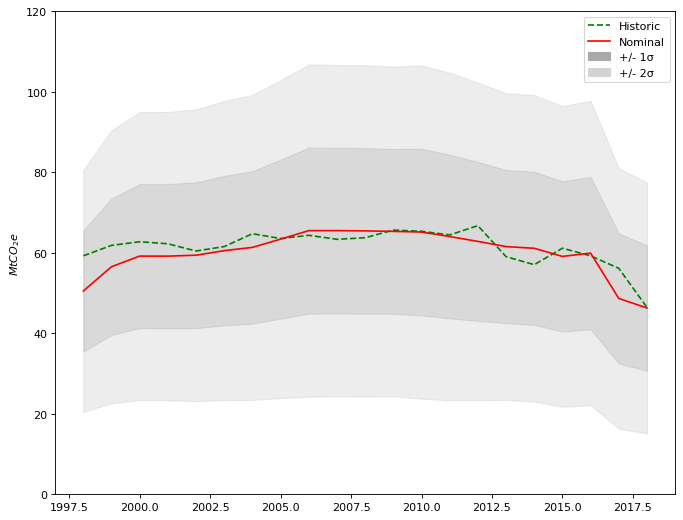

In [16]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
ghgeSTD = np.std(outcomes_filtered['GHGYear'],axis=0)
ghge2STD = 2*np.std(outcomes_filtered['GHGYear'],axis=0)

ghgeMean = np.mean(outcomes_filtered['GHGYear'],axis=0)
ghgeNominal = outcomes_filtered[ooi][-1]
ghgeHistoric = historic_emissions_df[historic_emissions_df.index > 1997]['Hist_GHGE_MtCO2e'].values

#PLOT MEAN
#lineMean, = plt.plot(time,ghgeMean, 'b-', label = 'Mean')

#PLOT STD and 2STD
plt.fill_between(x=time,y1=ghgeNominal - ghgeSTD, y2=ghgeNominal + ghgeSTD,
                 color='gray', alpha=0.2)
plt.fill_between(x=time,y1=ghgeNominal - ghge2STD, y2=ghgeNominal + ghge2STD,
                 color='darkgray', alpha=0.2)

#PLOT Historic
lineHist, = plt.plot(time,ghgeHistoric, 'g--', label = 'Historic')

#PLOT Nominal
lineNominal, = plt.plot(time,ghgeNominal, 'r-', label = 'Nominal')

lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')


#PLOT legend, and title

plt.legend(handles=[lineHist,lineNominal,darkgrey_patch,lightgrey_patch])
axes = plt.gca()
axes.set_ylim([0,120])
ylabel = axes.set_ylabel('$MtCO_2e$')
#plt.suptitle("{}".format(ooi), fontsize=15)

In [17]:
withinSTD = ((ghgeHistoric < ghgeNominal + ghgeSTD) & (ghgeHistoric > ghgeNominal - ghgeSTD)).sum()
numCases = len(ghgeHistoric)
withinSTDpercentage = (withinSTD/numCases) * 100.0
print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

withinSTD = ((ghgeHistoric < ghgeNominal + 2*ghgeSTD) & (ghgeHistoric > ghgeNominal - 2*ghgeSTD)).sum()
numCases = len(ghgeHistoric)
withinSTDpercentage = (withinSTD/numCases) * 100.0
print(f'{withinSTD} cases within the 2STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

21 cases within the STD range out of 21, which makes 100.0% of total cases
21 cases within the 2STD range out of 21, which makes 100.0% of total cases


Densities (PDF): {'30.6 to 38.2': '0.013', '38.2 to 45.9': '0.021', '45.9 to 53.5': '0.017', '53.5 to 61.2': '0.021', '61.2 to 68.8': '0.017', '68.8 to 76.4': '0.021', '76.4 to 84.1': '0.021'}
% in Bin: {'0.0 to 7.6': '0.0%', '7.6 to 15.3': '0.0%', '15.3 to 22.9': '0.0%', '22.9 to 30.6': '0.0%', '30.6 to 38.2': '9.8%', '38.2 to 45.9': '16.1%', '45.9 to 53.5': '12.9%', '53.5 to 61.2': '16.1%', '61.2 to 68.8': '12.9%', '68.8 to 76.4': '16.1%', '76.4 to 84.1': '16.1%'}

Densities (PDF): {'29.9 to 39.6': '0.005', '39.6 to 49.3': '0.016', '49.3 to 59.0': '0.016', '59.0 to 68.7': '0.017', '68.7 to 78.4': '0.017', '78.4 to 88.1': '0.015', '88.1 to 97.7': '0.011', '97.7 to 107.4': '0.007'}
% in Bin: {'0.8 to 10.5': '0.0%', '10.5 to 20.2': '0.0%', '20.2 to 29.9': '0.0%', '29.9 to 39.6': '4.5%', '39.6 to 49.3': '15.8%', '49.3 to 59.0': '15.9%', '59.0 to 68.7': '16.4%', '68.7 to 78.4': '16.2%', '78.4 to 88.1': '14.5%', '88.1 to 97.7': '10.3%', '97.7 to 107.4': '6.3%'}

Densities (PDF): {'34.3 to 

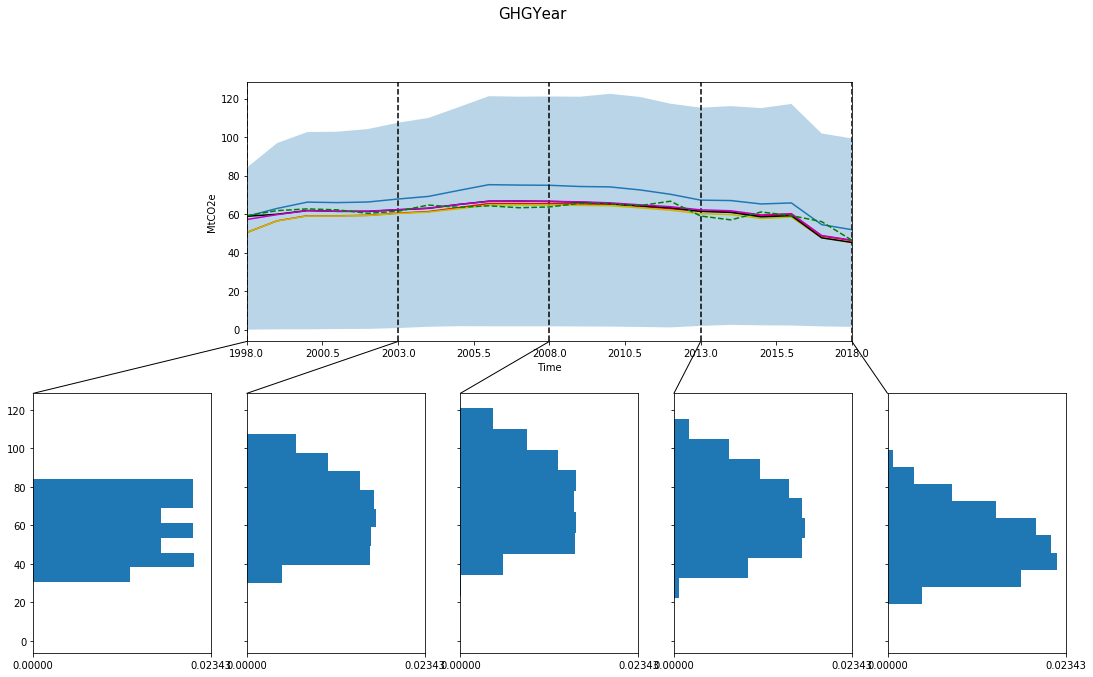

In [18]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
                                 points_in_time=[0,5,10,15,20], density = Density.HIST, grouping_specifiers=None,
                                 titles={ooi}, ylabels={ooi: "MtCO2e"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels([startYear + x / 10.0 for x in range(0,len(time)*10,25)])

#Add BAU in the plot with a red line
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-')

ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][63738], 'y-')
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][27332], 'k-')
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][25713], 'm-')

 
ax_env[ooi]['main plot'].plot(historic_emissions_df[historic_emissions_df.index > 1997]['Hist_GHGE_MtCO2e'].values, 'g--')



## Add historic figures
ax_env

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)
#plt.legend()

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


### Wholesale prices (primary market)

In [19]:
#from startYear
startYear_wholesale = 2005
startYearShift_wholesale = (startYear_wholesale - 1998)

#time = outcomes['TIMEYear'][0, startYearShift:]
time_wholesale = outcomes['TIMEYear'][0, startYearShift_wholesale:-30]

#points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [ x - startYear for x in points_of_interest]

points_of_interest_wholesale = [0,5,10,15]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered_wholesale = {k:v[:, startYearShift_wholesale:-30] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [20]:
# Subset Sobol levers
#selected_levers = list(['rooftopPV','annualCpi', 'generationRolloutPeriod', 'generatorRetirement','capacityFactorChangeBrownCoal','semiScheduleMinCapMarketGen'])    

select_uncertainties = uncertainties
ooi = 'primaryWholesalePriceYear'

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, select_uncertainties] 



#### Best seeds according to MAD, RMSE, Euclidian distance metrics

In [21]:
b = 1.4826

abs_difference_list = list()
historic_wholesale_values = historic_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].resample('Y').mean().values
abs_difference_list = abs(historic_wholesale_values - outcomes_filtered_wholesale[ooi])

mad = np.median(abs_difference_list,axis=1)
print(f'Best possible MAD for {ooi} is {np.min(mad):.2f}, experiment index {np.argmin(mad)} vs. the MAD of Nominal {mad[-1]:.2f}')

#sumad = np.sum(abs_difference_list,axis=1)
#print(f'Best possible SumAD for {ooi} is {np.min(sumad)}, experiment index {np.argmin(sumad)} vs. the SumAD of BAU {sumad[-1]}')

rms = np.sqrt(np.mean(np.square(historic_wholesale_values - outcomes_filtered_wholesale[ooi]),axis=1))
print(f'Best possible RMS for {ooi} is {np.min(rms):.2f}, experiment index {np.argmin(rms)} vs. the RMS of Nominal {rms[-1]:.2f}')

#Euclidian distance
eucl = dist = np.linalg.norm(historic_wholesale_values -  outcomes_filtered_wholesale[ooi],axis=1)

print(f'Best possible Euclidean Distance for {ooi} is {np.min(eucl):.2f}, experiment index {np.argmin(eucl)} vs. the Euclidean Distance of Nominal {eucl[-1]:.2f}')

print(f'RMS for {ooi} of best experiment for GHGE (25713) {rms[25713]}')


Best possible MAD for primaryWholesalePriceYear is 4.48, experiment index 21709 vs. the MAD of Nominal 12.73
Best possible RMS for primaryWholesalePriceYear is 13.69, experiment index 74035 vs. the RMS of Nominal 19.18
Best possible Euclidean Distance for primaryWholesalePriceYear is 54.77, experiment index 74035 vs. the Euclidean Distance of Nominal 76.73
RMS for primaryWholesalePriceYear of best experiment for GHGE (25713) 29.39632107040073


#### Plots

Text(0, 0.5, '$\\MWh')

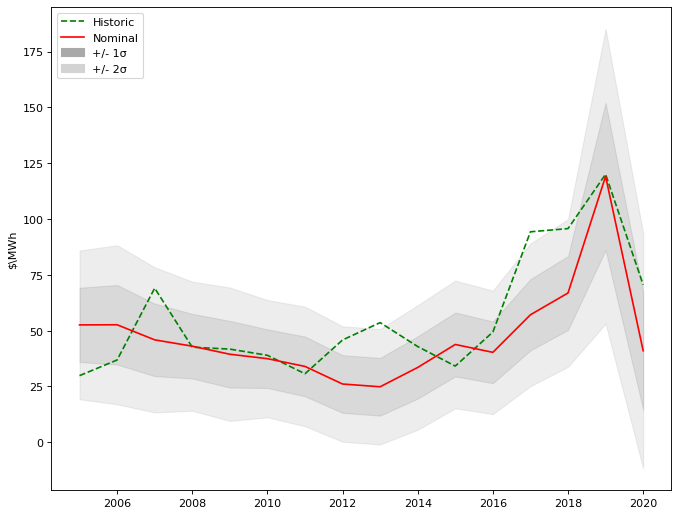

In [22]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
wholesaleSTD = np.std(outcomes_filtered_wholesale['primaryWholesalePriceYear'],axis=0)
wholesale2STD = 2*np.std(outcomes_filtered_wholesale['primaryWholesalePriceYear'],axis=0)

wholesaleMean = np.mean(outcomes_filtered_wholesale['primaryWholesalePriceYear'],axis=0)
wholesaleNominal = outcomes_filtered_wholesale[ooi][-1]

#PLOT MEAN
#lineMean, = plt.plot(time_wholesale, wholesaleMean, 'b-', label = 'Mean')

#PLOT STD
plt.fill_between(x=time_wholesale, y1=wholesaleNominal - wholesaleSTD, y2=wholesaleNominal + wholesaleSTD,
                 color='gray', alpha=0.2)
plt.fill_between(x=time_wholesale, y1=wholesaleNominal - wholesale2STD, y2=wholesaleNominal + wholesale2STD,
                 color='darkgray', alpha=0.2)

#PLOT Historic
lineHist, = plt.plot(time_wholesale,historic_wholesale_values, 'g--', label = 'Historic')

#PLOT Nominal
lineNominal, = plt.plot(time_wholesale, wholesaleNominal, 'r-', label = 'Nominal')


lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
plt.legend(handles=[lineHist,lineNominal,darkgrey_patch,lightgrey_patch],loc='upper left')
plt.ylabel('$\MWh')

#plt.suptitle("{}".format(ooi), fontsize=15)

In [23]:
withinSTD = ((historic_wholesale_values < wholesaleNominal + wholesaleSTD) & (historic_wholesale_values > wholesaleNominal - wholesaleSTD)).sum()
numCases = len(historic_wholesale_values)
withinSTDpercentage = (withinSTD/numCases) * 100.0
print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

within2STD = ((historic_wholesale_values < wholesaleNominal + wholesale2STD) & (historic_wholesale_values > wholesaleNominal - wholesale2STD)).sum()
numCases = len(historic_wholesale_values)
within2STDpercentage = (within2STD/numCases) * 100.0
print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')


9 cases within the STD range out of 16, which makes 56.25% of total cases
14 cases within the 2STD range out of 16, which makes 87.5% of total cases


#### Yearly STD applied to monthly data

In [24]:
std_series = pd.Series(name='STD',data=wholesaleSTD,index=pd.to_datetime(historic_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].resample('Y').mean().index))
std_series = std_series.resample('MS').bfill()

In [25]:
simul_data_wholesale_filtered = monthly_bau_results_df['Primary Wholesale ($/MWh)']
simul_data_wholesale_filtered.index = pd.to_datetime(simul_data_wholesale_filtered.index)

historic_wholesale_filtered = historic_wholesale_df["Volume Weighted Price (Historic) - $/MWh"]

from functools import reduce

historic_wholesale_list = [historic_wholesale_filtered, simul_data_wholesale_filtered, std_series]

historic_and_simul_wholesale_df = reduce(lambda x, y: pd.merge(x, y, on = 'Time (Month)'), historic_wholesale_list)
historic_and_simul_wholesale_df.head(10)


,Volume Weighted Price (Historic) - $/MWh,Primary Wholesale ($/MWh),STD
Time (Month),,,
2005-12-01,38.960349,57.446095,16.639938
2006-01-01,61.733179,57.181763,17.813750
2006-02-01,64.343011,57.588364,17.813750
2006-03-01,24.098932,56.680950,17.813750
2006-04-01,23.116048,36.875130,17.813750
2006-05-01,30.321222,59.852703,17.813750
2006-06-01,36.140421,69.660164,17.813750
2006-07-01,52.104985,65.930725,17.813750
2006-08-01,33.247872,59.291512,17.813750


C:\Users\angel\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



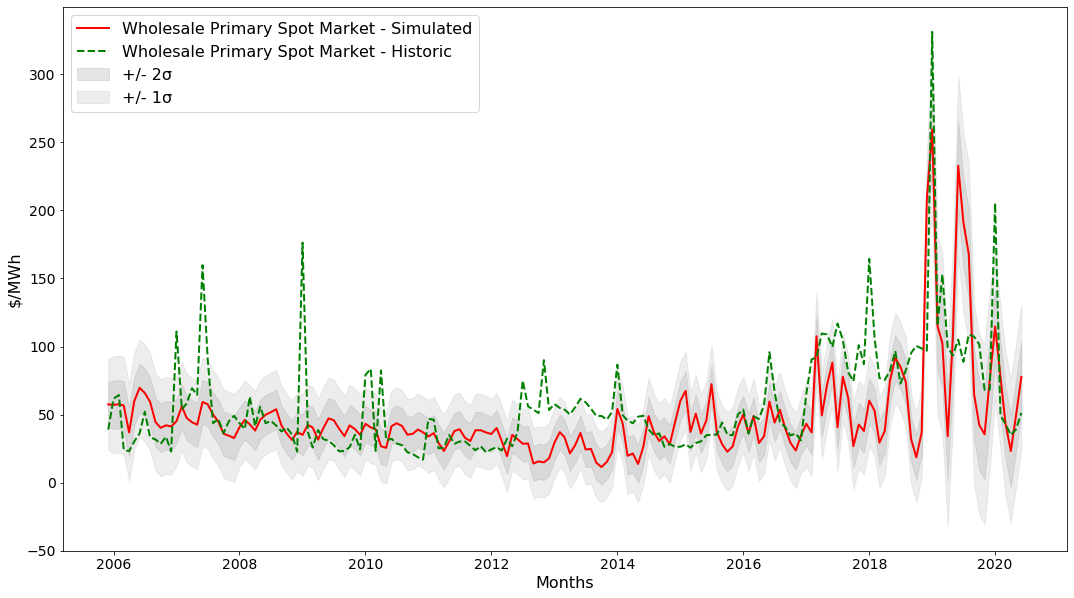

In [26]:
plt.figure(figsize=(18,10))

#plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='darkgoldenrod', markersize=8, color='burlywood', linewidth=4)
#plt.plot( 'Wholesale ($/MWh)', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4)

plt.plot( 'Primary Wholesale ($/MWh)', data=historic_and_simul_wholesale_df, color='r', linewidth=2, label='Wholesale Primary Spot Market - Simulated')
plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, color='g', linestyle='--', linewidth=2, label='Wholesale Primary Spot Market - Historic')

#PLOT STD
monthWholeSTD = historic_and_simul_wholesale_df['STD'].values
monthWhole2STD = 2* historic_and_simul_wholesale_df['STD'].values

monthNominalWhole = historic_and_simul_wholesale_df['Primary Wholesale ($/MWh)'].values
monthHistoricWhole = historic_and_simul_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].values

plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWholeSTD, y2=monthNominalWhole + monthWholeSTD,
                 color='gray', alpha=0.2, label='+/- 2\u03C3')
plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWhole2STD, y2=monthNominalWhole + monthWhole2STD,
                 color='darkgray', alpha=0.2, label='+/- 1\u03C3')


plt.xlabel('Months', size = 16)
plt.ylabel('$/MWh', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.legend(prop={'size':16})

In [27]:
withinSTD = ((monthHistoricWhole < monthNominalWhole + monthWholeSTD) & (monthHistoricWhole > monthNominalWhole - monthWholeSTD)).sum()
numCases = len(monthHistoricWhole)
withinSTDpercentage = (withinSTD/numCases) * 100.0
print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

within2STD = ((monthHistoricWhole < monthNominalWhole + monthWhole2STD) & (monthHistoricWhole > monthNominalWhole - monthWhole2STD)).sum()
numCases = len(monthHistoricWhole)
within2STDpercentage = (within2STD/numCases) * 100.0
print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')


83 cases within the STD range out of 175, which makes 47.42857142857143% of total cases
128 cases within the 2STD range out of 175, which makes 73.14285714285714% of total cases


#### Monthly STD applied to monthly data

In [28]:
#compute STD and MEAN
wholesaleSTDmonth = np.std(outcomes_filtered_wholesale['primaryWholesalePriceMonth'],axis=0)
wholesaleMeanMonth = np.mean(outcomes_filtered_wholesale['primaryWholesalePriceMonth'],axis=0)

In [29]:
std_series = pd.Series(name='STD',data=wholesaleSTDmonth,index=pd.to_datetime(outcomes_filtered_wholesale['TIMEMonth'][0]))
std_series = std_series.rename_axis('Time (Month)')
simul_data_wholesale_filtered = monthly_bau_results_df['Primary Wholesale ($/MWh)']
simul_data_wholesale_filtered.index = pd.to_datetime(simul_data_wholesale_filtered.index)

historic_wholesale_filtered = historic_wholesale_df["Volume Weighted Price (Historic) - $/MWh"]

from functools import reduce

historic_wholesale_list = [historic_wholesale_filtered, simul_data_wholesale_filtered, std_series]

historic_and_simul_wholesale_df = reduce(lambda x, y: pd.merge(x, y, on = 'Time (Month)'), historic_wholesale_list)
historic_and_simul_wholesale_df.head(20)

,Volume Weighted Price (Historic) - $/MWh,Primary Wholesale ($/MWh),STD
Time (Month),,,
2005-04-01,31.809904,50.977581,15.120520
2005-05-01,25.330109,73.295975,23.536240
2005-06-01,24.249596,75.995628,28.852428
2005-07-01,27.651352,65.889755,21.139394
2005-08-01,32.022126,65.438713,21.179948
2005-09-01,30.483665,56.940495,17.085365
2005-10-01,23.191077,43.066147,14.211052
2005-11-01,34.721235,38.886906,13.060326
2005-12-01,38.960349,57.446095,37.018032


In [30]:
b = 1.4826

abs_difference_list = list()
historic_wholesale_values = historic_wholesale_filtered.values
monthNominalWhole = historic_and_simul_wholesale_df['Primary Wholesale ($/MWh)'].values

abs_difference_list = abs(historic_wholesale_values - monthNominalWhole)

mad = np.median(abs_difference_list)
print(f'The MAD of Nominal {mad:.2f}')

#sumad = np.sum(abs_difference_list,axis=1)
#print(f'Best possible SumAD for {ooi} is {np.min(sumad)}, experiment index {np.argmin(sumad)} vs. the SumAD of BAU {sumad[-1]}')

rms = np.sqrt(np.mean(np.square(historic_wholesale_values - monthNominalWhole)))
print(f'The RMS of Nominal {rms:.2f}')

#Euclidian distance
eucl = dist = np.linalg.norm(historic_wholesale_values -  monthNominalWhole)

print(f'The Euclidean Distance of Nominal {eucl:.2f}')

The MAD of Nominal 16.08
The RMS of Nominal 35.23
The Euclidean Distance of Nominal 476.54


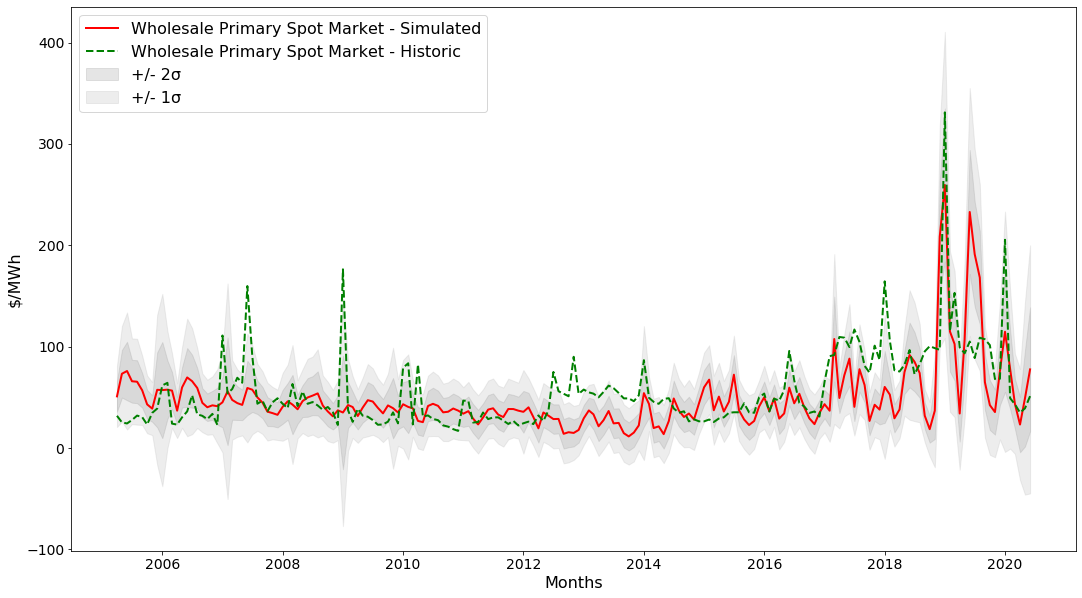

In [31]:
plt.figure(figsize=(18,10))

#plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='darkgoldenrod', markersize=8, color='burlywood', linewidth=4)
#plt.plot( 'Wholesale ($/MWh)', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4)


plt.plot( 'Primary Wholesale ($/MWh)', data=historic_and_simul_wholesale_df, color='r', linewidth=2, label='Wholesale Primary Spot Market - Simulated')
plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, color='g', linestyle='--', linewidth=2, label='Wholesale Primary Spot Market - Historic')

#PLOT STD
monthWholeSTD = historic_and_simul_wholesale_df['STD'].values
monthWhole2STD = 2 * historic_and_simul_wholesale_df['STD'].values

plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWholeSTD, y2=monthNominalWhole + monthWholeSTD,
                 color='gray', alpha=0.2,label='+/- 2\u03C3')
plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWhole2STD, y2=monthNominalWhole + monthWhole2STD,
                 color='darkgray', alpha=0.2,label='+/- 1\u03C3')


plt.xlabel('Months', size = 16)
plt.ylabel('$/MWh', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16},loc='upper left')

In [32]:
historicWholeMonth = historic_and_simul_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].values

withinSTD = ((historicWholeMonth < monthNominalWhole + monthWholeSTD) & (historicWholeMonth > monthNominalWhole - monthWholeSTD)).sum()
withinSTDpercentage = (withinSTD/len(historicWholeMonth)) * 100.0
print(f'{withinSTD} cases within the STD range out of {len(historicWholeMonth)}, which makes {withinSTDpercentage}% of total cases')


within2STD = ((historicWholeMonth < monthNominalWhole + monthWhole2STD) & (historicWholeMonth > monthNominalWhole - monthWhole2STD)).sum()
within2STDpercentage = (within2STD/len(historicWholeMonth)) * 100.0
print(f'{within2STD} cases within the 2STD range out of {len(historicWholeMonth)}, which makes {within2STDpercentage}% of total cases')


93 cases within the STD range out of 183, which makes 50.81967213114754% of total cases
146 cases within the 2STD range out of 183, which makes 79.78142076502732% of total cases


Densities (PDF): {'4.6 to 16.7': '0.021', '16.7 to 28.9': '0.023', '28.9 to 41.0': '0.020', '41.0 to 53.2': '0.011', '53.2 to 65.4': '0.005', '65.4 to 77.5': '0.002'}
% in Bin: {'4.6 to 16.7': '25.4%', '16.7 to 28.9': '27.8%', '28.9 to 41.0': '24.4%', '41.0 to 53.2': '13.1%', '53.2 to 65.4': '6.1%', '65.4 to 77.5': '2.1%', '77.5 to 89.7': '0.8%', '89.7 to 101.8': '0.2%', '101.8 to 114.0': '0.1%', '114.0 to 126.2': '0.1%', '126.2 to 138.3': '0.0%'}

Densities (PDF): {'6.1 to 13.4': '0.007', '13.4 to 20.8': '0.022', '20.8 to 28.1': '0.030', '28.1 to 35.4': '0.029', '35.4 to 42.7': '0.022', '42.7 to 50.0': '0.013', '50.0 to 57.3': '0.007', '57.3 to 64.7': '0.004', '64.7 to 72.0': '0.002'}
% in Bin: {'6.1 to 13.4': '5.2%', '13.4 to 20.8': '16.4%', '20.8 to 28.1': '22.3%', '28.1 to 35.4': '21.1%', '35.4 to 42.7': '15.9%', '42.7 to 50.0': '9.6%', '50.0 to 57.3': '5.1%', '57.3 to 64.7': '2.7%', '64.7 to 72.0': '1.3%', '72.0 to 79.3': '0.4%', '79.3 to 86.6': '0.1%'}

Densities (PDF): {'6.1 to 

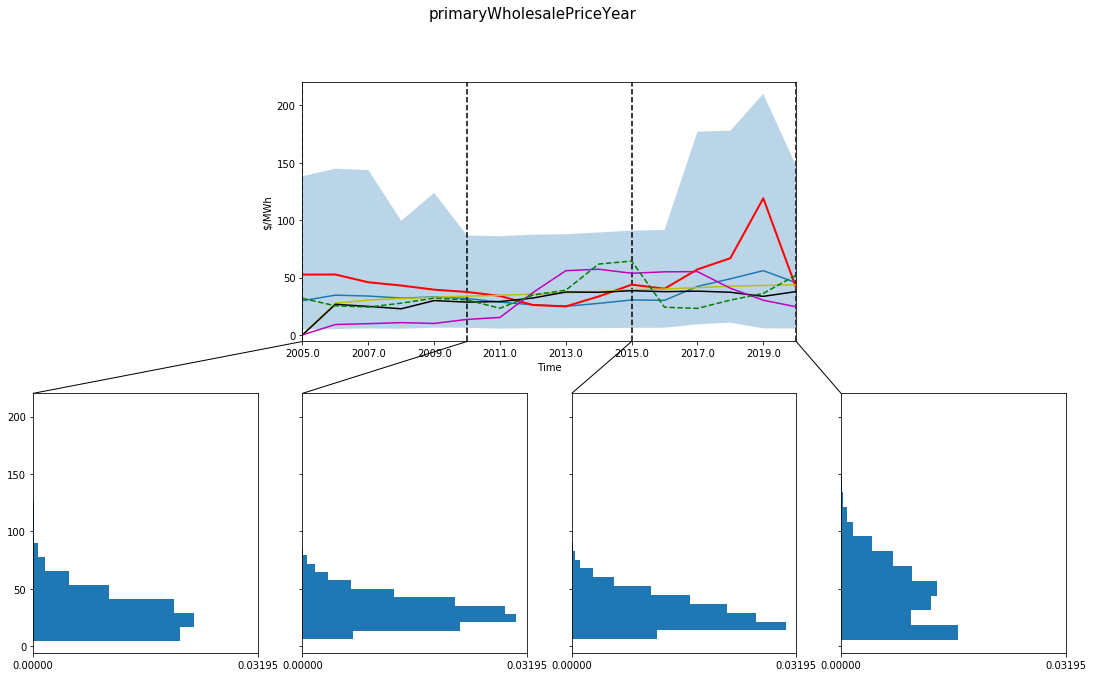

In [33]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

# fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest,  density = Density.HIST,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
#                                  fill=True, plot_type=PlotType.ENVELOPE)

fig, ax_env = multiple_densities(experiments, outcomes_filtered_wholesale, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest_wholesale,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels([startYear_wholesale + x / 10.0 for x in range(0,len(time_wholesale)*10,20)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered_wholesale[ooi][-1], 'r-',linewidth=2 )
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][21709], 'y-')
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][48583], 'k-')
ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][74035], 'm-')
 

ax_env[ooi]['main plot'].plot(historic_wholesale_values, 'g--')


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


### Tariffs

In [34]:
#from startYear
startYear_tariffs = 2001
startYearShift_tariffs = (startYear_tariffs - 1998)

#time = outcomes['TIMEYear'][0, startYearShift:]
time_tariffs = outcomes['TIMEYear'][0, startYearShift_tariffs:-31]

#points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [ x - startYear for x in points_of_interest]

points_of_interest_tariffs = [0,4,8,12]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered_tariffs = {k:v[:, startYearShift_tariffs:-31] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [35]:
# Subset Sool levers/uncertainties
selected_uncertainties = uncertainties

#selected_levers = levers
ooi = 'tariffsYear'
data = outcomes_filtered_tariffs[ooi]

num_exp = len(data)
out_avg_ooi = np.zeros(num_exp)

for i in range(num_exp):
    out_avg_ooi[i] = data[i].mean()

exp = pd.DataFrame(experiments)

exp = exp.loc[ :, selected_uncertainties] 

Text(0, 0.5, '$c/kWh$')

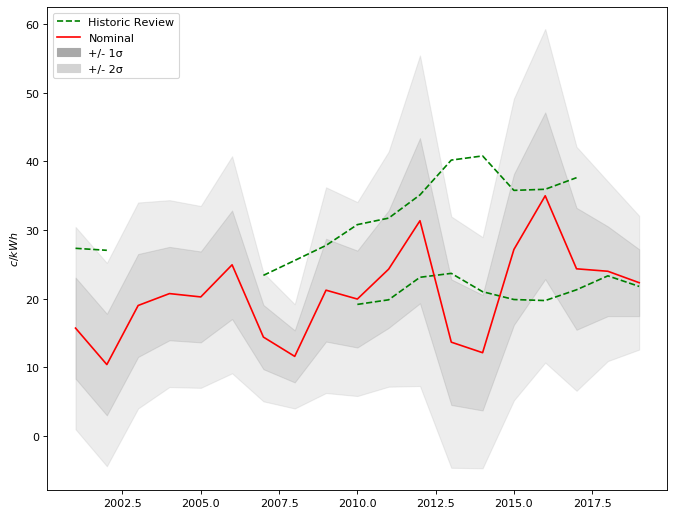

In [36]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
tariffsSTD = np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)
tariffs2STD = 2*np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)


tariffsMean = np.mean(outcomes_filtered_tariffs['tariffsYear'],axis=0)
tariffsNominal = outcomes_filtered_tariffs[ooi][-1]
tariffsHistoricVinnies = yearly_historic_tariffs['St Vinnies Historic c/kWh (2019) '].values
tariffsHistoricReview = yearly_historic_tariffs['Historic price from review c/KWh (2019)'].values

#PLOT MEAN
#lineMean, = plt.plot(time_tariffs, tariffsMean, 'b-', label = 'Mean')

#PLOT STD and 2STD
plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffsSTD, y2=tariffsNominal + tariffsSTD,
                 color='gray', alpha=0.2,label='+/- 2\u03C3')
plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffs2STD, y2=tariffsNominal + tariffs2STD,
                 color='darkgray', alpha=0.2,label='+/- 1\u03C3')
#PLOT Historic
lineHist, = plt.plot(time_tariffs,tariffsHistoricVinnies, 'g--', label = 'Historic St. Vinnies')
lineHist, = plt.plot(time_tariffs,tariffsHistoricReview, 'g--', label = 'Historic Review')


#PLOT Nominal
lineNominal, = plt.plot(time_tariffs, tariffsNominal, 'r-', label = 'Nominal')

#PLOT legend, and title
plt.legend(handles=[lineHist,lineNominal,darkgrey_patch,lightgrey_patch],loc='upper left')
plt.ylabel('$c/kWh$')

#plt.suptitle("{}".format(ooi), fontsize=15)

Text(0, 0.5, '$c/kWh$')

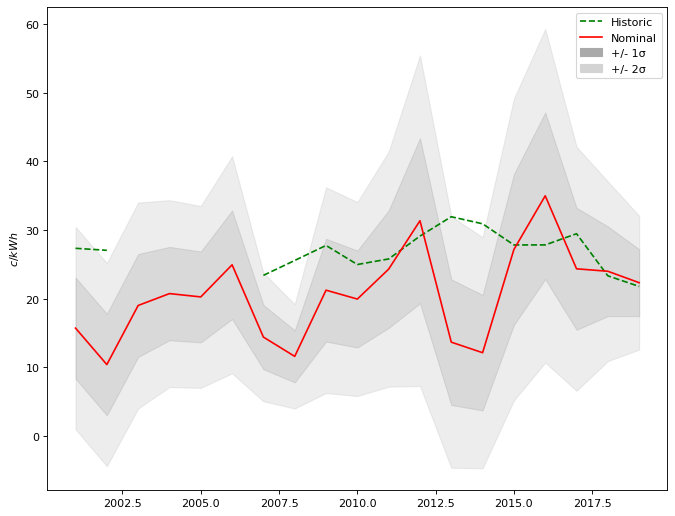

In [37]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
tariffsSTD = np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)
tariffs2STD = 2*np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)


tariffsMean = np.mean(outcomes_filtered_tariffs['tariffsYear'],axis=0)
tariffsNominal = outcomes_filtered_tariffs[ooi][-1]
tariffsAverageHistoric = yearly_historic_tariffs.mean(axis=1)

#PLOT MEAN
#lineMean, = plt.plot(time_tariffs, tariffsMean, 'b-', label = 'Mean')

#PLOT STD
plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffsSTD, y2=tariffsNominal + tariffsSTD,
                 color='gray', alpha=0.2)
plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffs2STD, y2=tariffsNominal + tariffs2STD,
                 color='darkgray', alpha=0.2)

#PLOT Historic
lineHist, = plt.plot(time_tariffs,tariffsAverageHistoric, 'g--', label = 'Historic')

#PLOT Nominal
lineNominal, = plt.plot(time_tariffs, tariffsNominal, 'r-', label = 'Nominal')

lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
plt.legend(handles=[lineHist,lineNominal,darkgrey_patch,lightgrey_patch])
plt.ylabel('$c/kWh$')

#plt.suptitle("{}".format(ooi), fontsize=15)

In [38]:
withinSTD = ((tariffsAverageHistoric < tariffsNominal + tariffsSTD) & (tariffsAverageHistoric > tariffsNominal - tariffsSTD)).sum()
numCases = np.sum(tariffsAverageHistoric.count())
withinSTDpercentage = (withinSTD/numCases) * 100.0
print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

within2STD = ((tariffsAverageHistoric < tariffsNominal + tariffs2STD) & (tariffsAverageHistoric > tariffsNominal - tariffs2STD)).sum()
numCases = np.sum(tariffsAverageHistoric.count())
within2STDpercentage = (within2STD/numCases) * 100.0
print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')


9 cases within the STD range out of 15, which makes 60.0% of total cases
12 cases within the 2STD range out of 15, which makes 80.0% of total cases


#### Best seeds according to statistics  MAD, RMSE, Euclidian distance

In [39]:
b = 1.4826

abs_difference_list = list()

abs_difference_list = abs(tariffsAverageHistoric.values - tariffsNominal)

mad = np.median(abs_difference_list[~np.isnan(abs_difference_list)])
print(f'The MAD of Nominal {mad:.2f}')

#Root-mean square error
squareTariffs = np.square(tariffsAverageHistoric.values - tariffsNominal)
rms = np.sqrt(np.mean(squareTariffs[~np.isnan(squareTariffs)],axis=0))
print(f'The RMS of Nominal {rms:.2f}')


The MAD of Nominal 6.52
The RMS of Nominal 10.09


Densities (PDF): {'2.5 to 6.5': '0.064', '6.5 to 10.4': '0.069', '10.4 to 14.3': '0.046', '14.3 to 18.2': '0.032', '18.2 to 22.1': '0.020', '22.1 to 26.0': '0.010', '26.0 to 29.9': '0.006', '29.9 to 33.8': '0.004', '33.8 to 37.7': '0.003', '37.7 to 41.6': '0.001'}
% in Bin: {'2.5 to 6.5': '25.1%', '6.5 to 10.4': '26.9%', '10.4 to 14.3': '17.9%', '14.3 to 18.2': '12.6%', '18.2 to 22.1': '7.8%', '22.1 to 26.0': '4.1%', '26.0 to 29.9': '2.4%', '29.9 to 33.8': '1.6%', '33.8 to 37.7': '1.0%', '37.7 to 41.6': '0.5%', '41.6 to 45.5': '0.2%'}

Densities (PDF): {'2.1 to 5.1': '0.058', '5.1 to 8.2': '0.057', '8.2 to 11.3': '0.049', '11.3 to 14.3': '0.053', '14.3 to 17.4': '0.043', '17.4 to 20.5': '0.028', '20.5 to 23.5': '0.018', '23.5 to 26.6': '0.011', '26.6 to 29.7': '0.006', '29.7 to 32.7': '0.002'}
% in Bin: {'2.1 to 5.1': '17.9%', '5.1 to 8.2': '17.3%', '8.2 to 11.3': '15.1%', '11.3 to 14.3': '16.2%', '14.3 to 17.4': '13.3%', '17.4 to 20.5': '8.6%', '20.5 to 23.5': '5.6%', '23.5 to 26.6': 

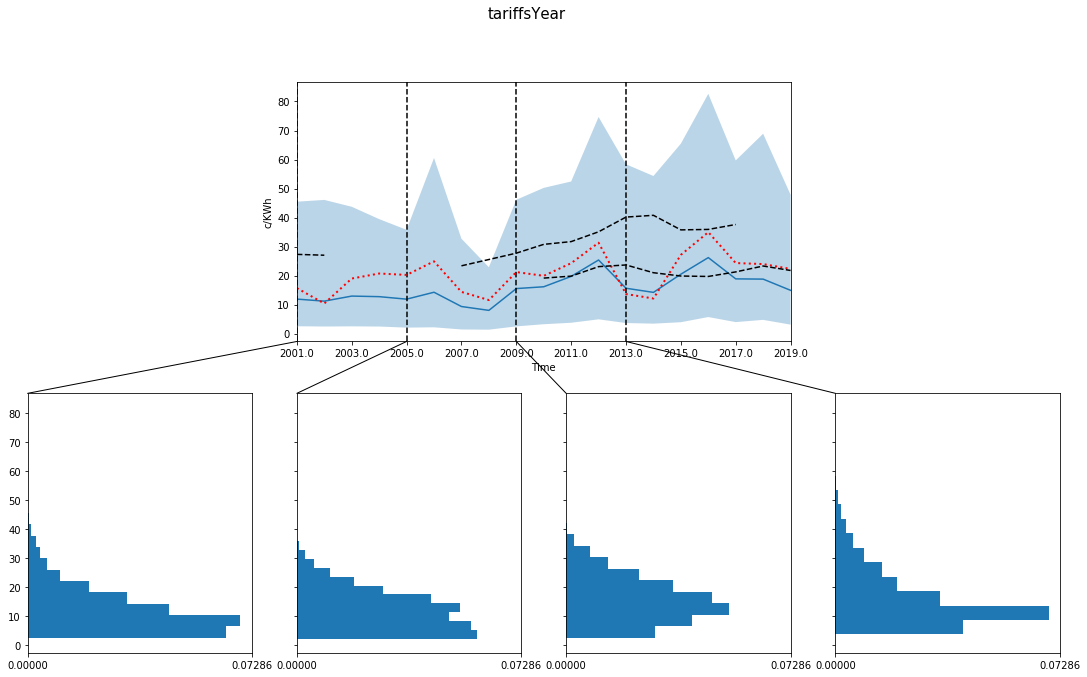

In [40]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density

fig, ax_env = multiple_densities(experiments, outcomes_filtered_tariffs, outcomes_to_show = ooi,
                                 points_in_time=points_of_interest_tariffs,  density = Density.HIST,
                                 grouping_specifiers=None , titles={ooi}, ylabels={ooi: "c/KWh"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels([startYear_tariffs + x / 10.0 for x in range(0,len(time_tariffs)*10,20)])
#Add BAU in the plot with a red wide line
ax_env[ooi]['main plot'].plot(outcomes_filtered_tariffs[ooi][-1], 'r:',linewidth=2 )

ax_env[ooi]['main plot'].plot(yearly_historic_tariffs['St Vinnies Historic c/kWh (2019) '].values, 'k--')
ax_env[ooi]['main plot'].plot(yearly_historic_tariffs['Historic price from review c/KWh (2019)'].values, 'k--')

fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')


## Renewable energy in the System

In [41]:
## Historic renewables in the system (from OpenNem data)

In [42]:
#from startYear
startYear_re = 2005
startYearShift_re = (startYear_re - 1998)

#time = outcomes['TIMEYear'][0, startYearShift:]
time_re = outcomes['TIMEYear'][0, startYearShift_re:-30]

#points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [ x - startYear for x in points_of_interest]

points_of_interest_re = [0,5,10,15]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered_re = {k:v[:, startYearShift_re:-30] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [43]:
ooi = 'renewableContributionYear'

In [44]:
## Energy Production per month per technology
histSolarRooftop = historic_wholesale_df['Solar (Rooftop) - GWh'].resample('YS').mean().values
histSolarUtility = historic_wholesale_df['Solar (Utility) - GWh'].resample('YS').mean().values
histWind = historic_wholesale_df['Wind - GWh'].resample('YS').mean().values
histHydro = historic_wholesale_df['Hydro - GWh'].resample('YS').mean().values
histBatt = historic_wholesale_df['Battery (Discharging) - GWh'].resample('YS').mean().values
histGasOcgt = historic_wholesale_df['Gas (OCGT) - GWh'].resample('YS').mean().values
histGasCcgt = historic_wholesale_df['Gas (Steam) - GWh'].resample('YS').mean().values
histBC = historic_wholesale_df['Brown Coal - GWh'].resample('YS').mean().values
histImport = historic_wholesale_df['Imports - GWh'].resample('YS').mean().values
histExport = historic_wholesale_df['Exports - GWh'].resample('YS').mean().values

allProduction = histSolarRooftop + histSolarUtility + histWind + histHydro + histBatt + histGasCcgt + histGasOcgt + histBC

histRenewableProductionPerc = ((histSolarRooftop+histSolarUtility+histHydro+histWind) / allProduction) 

Text(0, 0.5, '% RE')

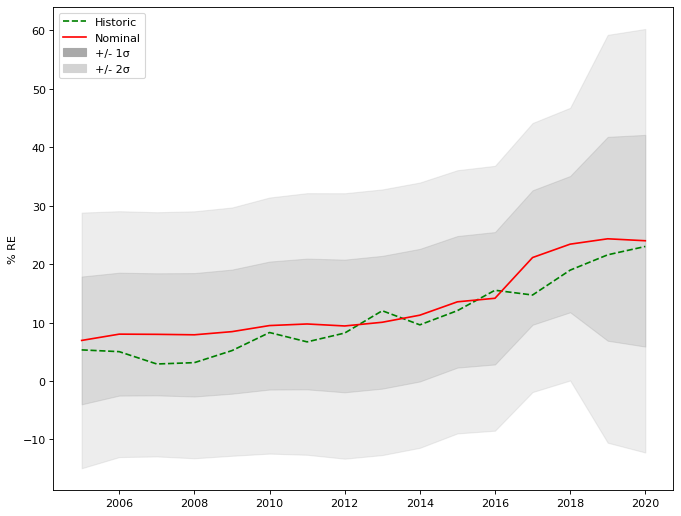

In [49]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
reSTD = np.std(outcomes_filtered_re['renewableContributionYear']*100,axis=0)
re2STD = 2*np.std(outcomes_filtered_re['renewableContributionYear']*100,axis=0)

reMean = np.mean(outcomes_filtered_re['renewableContributionYear'],axis=0)
reNominal = outcomes_filtered_re[ooi][-1]*100
reHistoric = histRenewableProductionPerc*100

#PLOT MEAN
#lineMean, = plt.plot(time_re,reMean, 'b-', label = 'Mean')

#PLOT STD
plt.fill_between(x=time_re,y1=reNominal - reSTD, y2=reNominal + reSTD,
                 color='gray', alpha=0.2)
plt.fill_between(x=time_re,y1=reNominal - re2STD, y2=reNominal + re2STD,
                 color='darkgray', alpha=0.2)

#PLOT Historic
lineHist, = plt.plot(time_re,reHistoric, 'g--', label = 'Historic')

#PLOT Nominal
lineNominal, = plt.plot(time_re,reNominal, 'r-', label = 'Nominal')


lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
plt.legend(handles=[lineHist,lineNominal,darkgrey_patch,lightgrey_patch], loc = 'upper left')
plt.ylabel('% RE')

#plt.suptitle("{}".format(ooi), fontsize=15)

In [46]:
withinSTD = ((histRenewableProductionPerc < reNominal + reSTD) & (histRenewableProductionPerc > reNominal - reSTD)).sum()
numCases = len(histRenewableProductionPerc)
withinSTDpercentage = (withinSTD/numCases) * 100.0
print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

within2STD = ((histRenewableProductionPerc < reNominal + re2STD) & (histRenewableProductionPerc > reNominal - re2STD)).sum()
numCases = len(histRenewableProductionPerc)
within2STDpercentage = (within2STD/numCases) * 100.0
print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')

16 cases within the STD range out of 16, which makes 100.0% of total cases
16 cases within the 2STD range out of 16, which makes 100.0% of total cases


In [47]:
b = 1.4826

abs_difference_list = list()

abs_difference_list = abs(histRenewableProductionPerc - reNominal)

mad = np.median(abs_difference_list[~np.isnan(abs_difference_list)])
print(f'The MAD of Nominal {mad:.2f}')

#Root-mean square error
squareTariffs = np.square(histRenewableProductionPerc - reNominal)
rms = np.sqrt(np.mean(squareTariffs[~np.isnan(squareTariffs)],axis=0))
print(f'The RMS of Nominal {rms:.2f}')


The MAD of Nominal 0.02
The RMS of Nominal 0.03
